# TRABAJO FINAL DE MAESTRIA 
## Modelo predictivo de impago a préstamos bancarios de consumo

### Autor: Xavier Pimentel 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [2]:
dataset1 = pd.read_csv("D:/Documentos_D/UNIR/Tercer_semetre/Trabajo_final/application_data.csv/application_data.csv")

In [3]:
descripcion_data = pd.read_csv("D:/Documentos_D/UNIR/Tercer_semetre/Trabajo_final/columns_description.csv")

In [4]:
describe_data = dataset1.describe().T
print(describe_data)
#describe_data.to_excel("describe_data.xlsx")

                               count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%   

In [5]:
#tipo_variables = dataset1.dtypes.reset_index()
#tipo_variables.columns = ["variable","tipo de dato"]
#tipo_variables.to_excel("tipos_datos.xlsx", index=False)

In [6]:
#Contamos con 65 variables con punto flotante, 41 enteros y 16 strings
dataset1.dtypes.value_counts().reset_index()

,index,0
0,float64,65
1,int64,41
2,object,16


In [7]:
dataset1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#columnas_selecionadas = descripcion_data[["Row","Description"]]
#columnas_selecionadas.to_excel("metadata.xlsx")

In [9]:
##porcentaje de nulidad en variables 
nulidad_variables = dataset1.isnull().sum()
porcentaje_nulidad = (nulidad_variables / len(dataset1))*100 
print(porcentaje_nulidad)
##porcentaje_nulidad.to_excel("nulidad_variables.xlsx")

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [10]:
##porcentaje de NaNs en variables 
porcentaje_nan = (dataset1.isna().sum() / len(dataset1)) * 100
print(porcentaje_nan)
#porcentaje_nan.to_excel("nans_vairables.xlsx")

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [11]:
##porcentaje de INFs en variables 
porcentaje_inf = (dataset1.isin([np.inf, -np.inf]).sum() / len(dataset1)) * 100
print(porcentaje_inf)
#porcentaje_inf.to_excel("infs_variables.xlsx")

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 122, dtype: float64


In [12]:
##Duplicidad en llave primaria 
duplicados = dataset1[dataset1.duplicated(subset='SK_ID_CURR', keep=False)]
print(duplicados)

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIV

In [13]:
## vamos a empezar a modificar el dataset original, guardamos una copia antes 
dataset_modificado = dataset1 

In [14]:
#Observamos que algunas variables cuentan con valores negativos, y hacen referencia a dias, nos pueden ayudar en nuestro modelo
#vamos a pasarlas a valores positivos.
variables_negativas = ["DAYS_BIRTH",
"DAYS_EMPLOYED",
"DAYS_REGISTRATION",
"DAYS_ID_PUBLISH",
"DAYS_LAST_PHONE_CHANGE"
]

for variable in variables_negativas:
    dataset_modificado[variable] = dataset_modificado[variable].abs()


In [15]:
#print(dataset_modificado)
describe_data_mod = dataset_modificado.describe().T
#describe_data_mod.to_excel("describe_data_mod.xlsx")
dataset_modificado.shape

(307511, 122)

In [16]:
#vamos a quedarnos con aquellas variables que tengan menos del 35% de nulidad, esto para que la regla de imputación escogida no afecte
#de forma perjudicial los datos encontrados que si se van a mantener como variables candidatas a tomar en cuenta. 

porcentaje_nulidad_mod = (dataset_modificado.isnull().sum() / len(dataset_modificado))*100 
variables_escogidas = porcentaje_nulidad_mod[porcentaje_nulidad_mod < 35].index.tolist()
dataset_mod = dataset_modificado[variables_escogidas]

In [17]:
dataset_mod.shape

(307511, 73)

In [18]:
dataset_mod.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

In [19]:
#se revisan las variables tipo object, para verificar si tienen el tipo de dato y el dato coinciden 
variables_object = ["CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"NAME_CONTRACT_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"NAME_INCOME_TYPE",
"NAME_TYPE_SUITE",
"OCCUPATION_TYPE",
"ORGANIZATION_TYPE",
"WEEKDAY_APPR_PROCESS_START"]



In [20]:
#validamos que las variables contengan el tipo de dato y la variable correspondiente, estas las vamos a categorizar para nuestro
#modelo 
for var in variables_object:
    valores_unicos = dataset_mod[var].unique()
    print(var + ":" + str(valores_unicos))
     

CODE_GENDER:['M' 'F' 'XNA']
FLAG_OWN_CAR:['N' 'Y']
FLAG_OWN_REALTY:['Y' 'N']
NAME_CONTRACT_TYPE:['Cash loans' 'Revolving loans']
NAME_EDUCATION_TYPE:['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS:['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE:['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
NAME_INCOME_TYPE:['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_TYPE_SUITE:['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
OCCUPATION_TYPE:['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers

In [63]:
#vamos a categorizar estas variables, ya despues de verificar que son datos categoricos. 
#antes de agregarlos al dataset completo, haremos un diccionario con el valor original y el valor categorizado
df_categorizado = pd.DataFrame(columns=["Variable", "Valor Original", "Valor Categorizado"])

for columna in variables_object: 
    le = LabelEncoder()
    valores_originales = dataset_mod[columna].unique()
    categorias = le.fit_transform(valores_originales)
    for valor_original, categoria in zip(valores_originales, categorias):
        df_categorizado = df_categorizado.append({'Variable': columna, 'Valor Original': valor_original, 'Valor Categorizado': categoria}, ignore_index=True)

C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/730288450.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_categorizado = df_categorizado.append({'Variable': columna, 'Valor Original': valor_original, 'Valor Categorizado': categoria}, ignore_index=True)
C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/730288450.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_categorizado = df_categorizado.append({'Variable': columna, 'Valor Original': valor_original, 'Valor Categorizado': categoria}, ignore_index=True)
C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/730288450.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_categorizado = df_categorizado.append({'Variable': columna, 'Valor Original': valor_original, 

In [64]:
#df_categorizado.to_excel("categorias.xlsx")

In [66]:
#vamos a crear una copia antes del dataset original, y haremos uno con las variables categorizadas + cambios anteriores
dataset_cat = dataset_mod

In [67]:
#vamos a cambiar las variables originales del dataset por las categorizadas 
for col in variables_object: 
    le = LabelEncoder()
    categorias = le.fit_transform(dataset_cat[col])
    dataset_cat.loc[:,col] = categorias

C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/1143125934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat.loc[:,col] = categorias
C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/1143125934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat.loc[:,col] = categorias
C:\Users\xavie\AppData\Local\Temp/ipykernel_4300/1143125934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

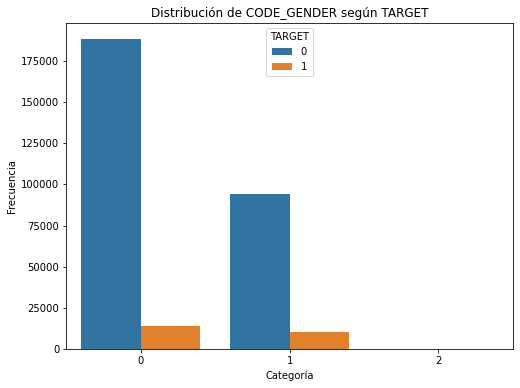

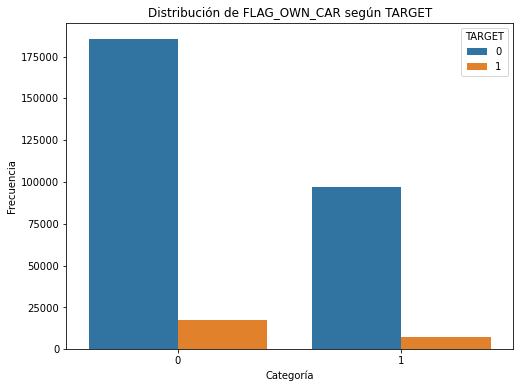

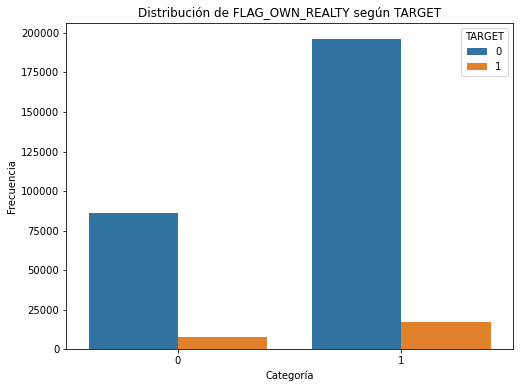

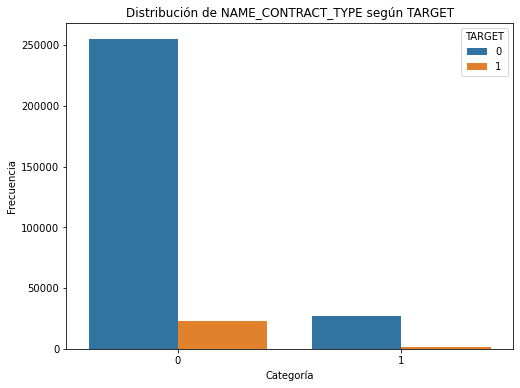

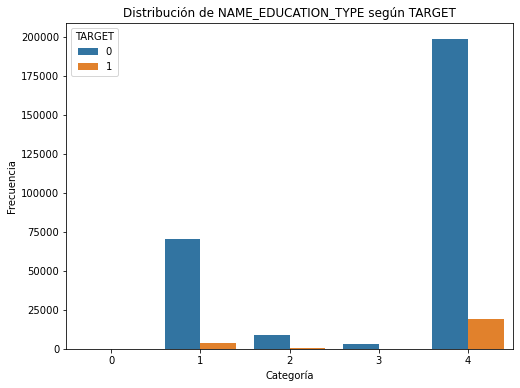

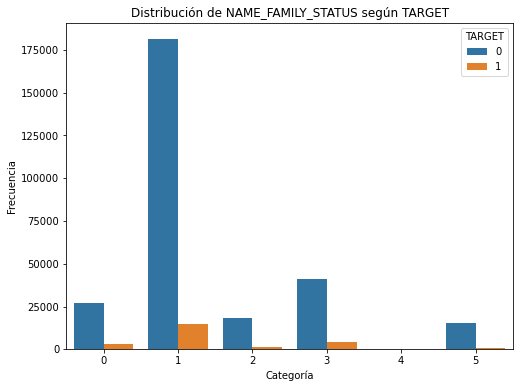

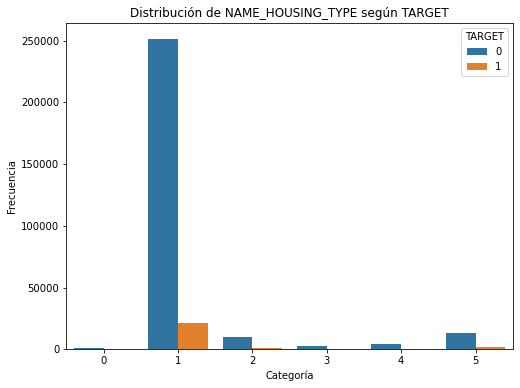

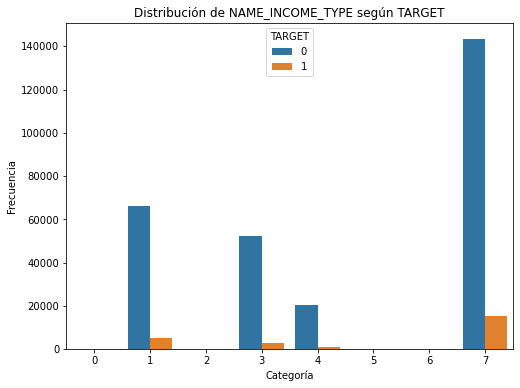

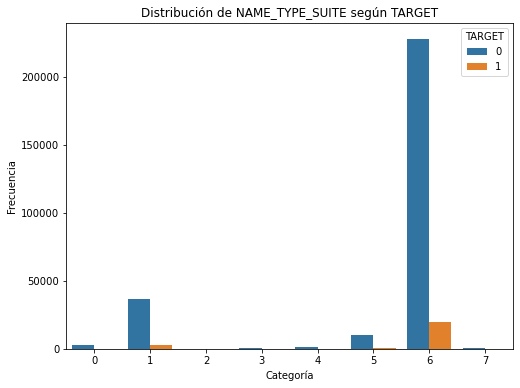

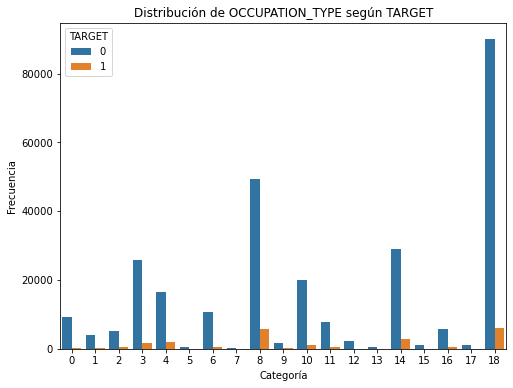

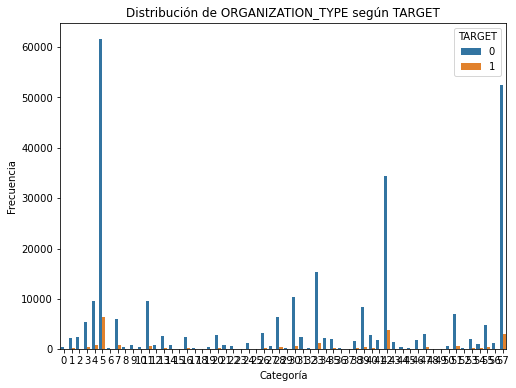

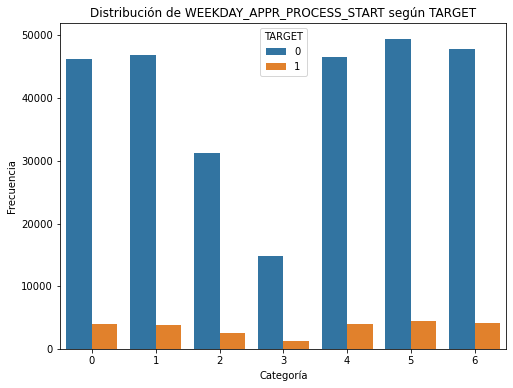

In [68]:
# Crear un gráfico de barras para las variables categorizadas vs. la variable TARGET (nuestra variable objetivo)
for variable in variables_object:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset_cat, x=variable, hue='TARGET')
    plt.title(f'Distribución de {variable} según TARGET')
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.legend(title='TARGET')
    plt.show()

In [69]:
describe_data_cat = dataset_cat.describe().T
#describe_data_cat.to_excel("describe_data_cat.xlsx")
dataset_cat.shape

(307511, 73)

In [70]:
##Se borran estas variables categoricas por el numero de nulidad, es bajo, sin embargo al colocarle 0 los nulos, caerían en una 
#categoria que no corresponden y si se coloca la media, es el mismo caso. Se decide borrarlas. 
dataset_cat = dataset_cat.drop(columns = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE"])

In [71]:
dataset_cat = dataset_cat.drop(columns = ["FLAG_DOCUMENT_12"])

In [72]:
##A las siguientes variables al tener menos de 3 desviaciones estándar, se le decide colocar el valor de la media, en los campos
## con nulidad
variables_connulidadbaja = ["AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_YEAR",
"CNT_FAM_MEMBERS",
"DEF_30_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"OBS_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE"]

In [73]:
for columna in variables_connulidadbaja:
    media_columna = dataset_cat[columna].mean()
    dataset_cat[columna] = dataset_cat[columna].fillna(media_columna)    

In [74]:
##Y a los siguientes valores, al tener un valor muy diferente en su desviacion estándar y contar con una nulidad baja, se decide 
##colocarle un cero en sus valores nulos
variables_nuloscero = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "DAYS_LAST_PHONE_CHANGE"]
dataset_cat[variables_nuloscero] = dataset_cat[variables_nuloscero].fillna(0)

In [75]:
nulidad_variables_cat = dataset_cat.isnull().sum()
porcentaje_nulidad_cat = (nulidad_variables_cat / len(dataset_cat))*100 
#print(porcentaje_nulidad_cat)
#porcentaje_nulidad_cat.to_excel("nulidad_variables_cat.xlsx")

In [76]:
##Ya quedamos limpios de nulidad, duplicidad, infinitos, NaNs, ya se categorizaron variables.. ahora un análisis de valores 
#atipicos, para poder ya darle paso a la modelacion. 

decil_80_var1 = dataset_cat['AMT_ANNUITY'].quantile(0.8)
decil_80_var2 = dataset_cat['AMT_CREDIT'].quantile(0.8)
decil_80_var3 = dataset_cat['AMT_GOODS_PRICE'].quantile(0.8)
decil_80_var4 = dataset_cat['AMT_INCOME_TOTAL'].quantile(0.8)
decil_80_var5 = dataset_cat['DAYS_EMPLOYED'].quantile(0.8)

dataset_cat = dataset_cat[dataset_cat['AMT_ANNUITY'] <= decil_80_var1]
dataset_cat = dataset_cat[dataset_cat['AMT_CREDIT'] <= decil_80_var2]
dataset_cat = dataset_cat[dataset_cat['AMT_GOODS_PRICE'] <= decil_80_var3]
dataset_cat = dataset_cat[dataset_cat['AMT_INCOME_TOTAL'] <= decil_80_var4]
dataset_cat = dataset_cat[dataset_cat['DAYS_EMPLOYED'] <= decil_80_var5]


In [77]:
dataset_cat.shape

(154690, 70)

C:\Users\xavie\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


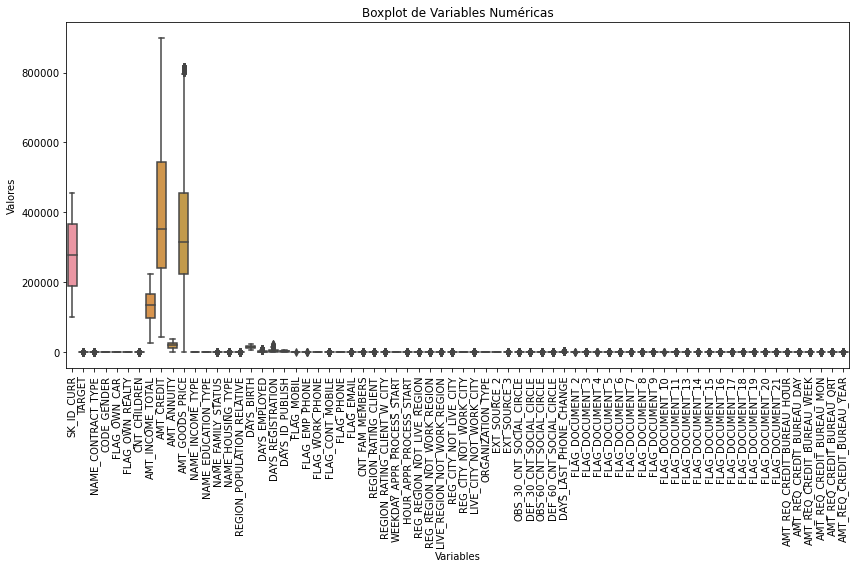

In [78]:
variables_numericas = dataset_cat.select_dtypes(include=[float, int])

# Crear el gráfico de caja y bigotes
plt.figure(figsize=(12, 8))
sns.boxplot(data=variables_numericas)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplot de Variables Numéricas')
plt.tight_layout()
plt.show()

In [110]:
variables_corr = ["REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY",
"FLAG_PHONE",
"FLAG_WORK_PHONE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_30_CNT_SOCIAL_CIRCLE",
"FLAG_OWN_CAR",
"CODE_GENDER",
"REG_REGION_NOT_LIVE_REGION",
"REG_CITY_NOT_LIVE_CITY",
"DAYS_EMPLOYED"
]

In [112]:
dataset_cat_corr = dataset_cat[variables_corr]

In [114]:
matriz_subset_corr = dataset_cat_corr.corr()

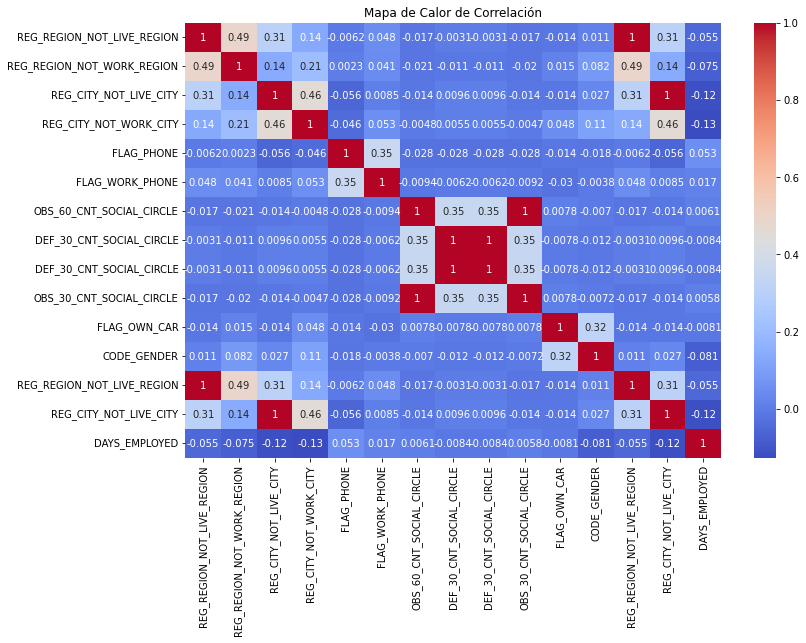

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_subset_corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [79]:
#veremos la correlacion entre las variables para verificar si no hay colinealidad entre ellas 

matriz_corr = dataset_cat.corr()

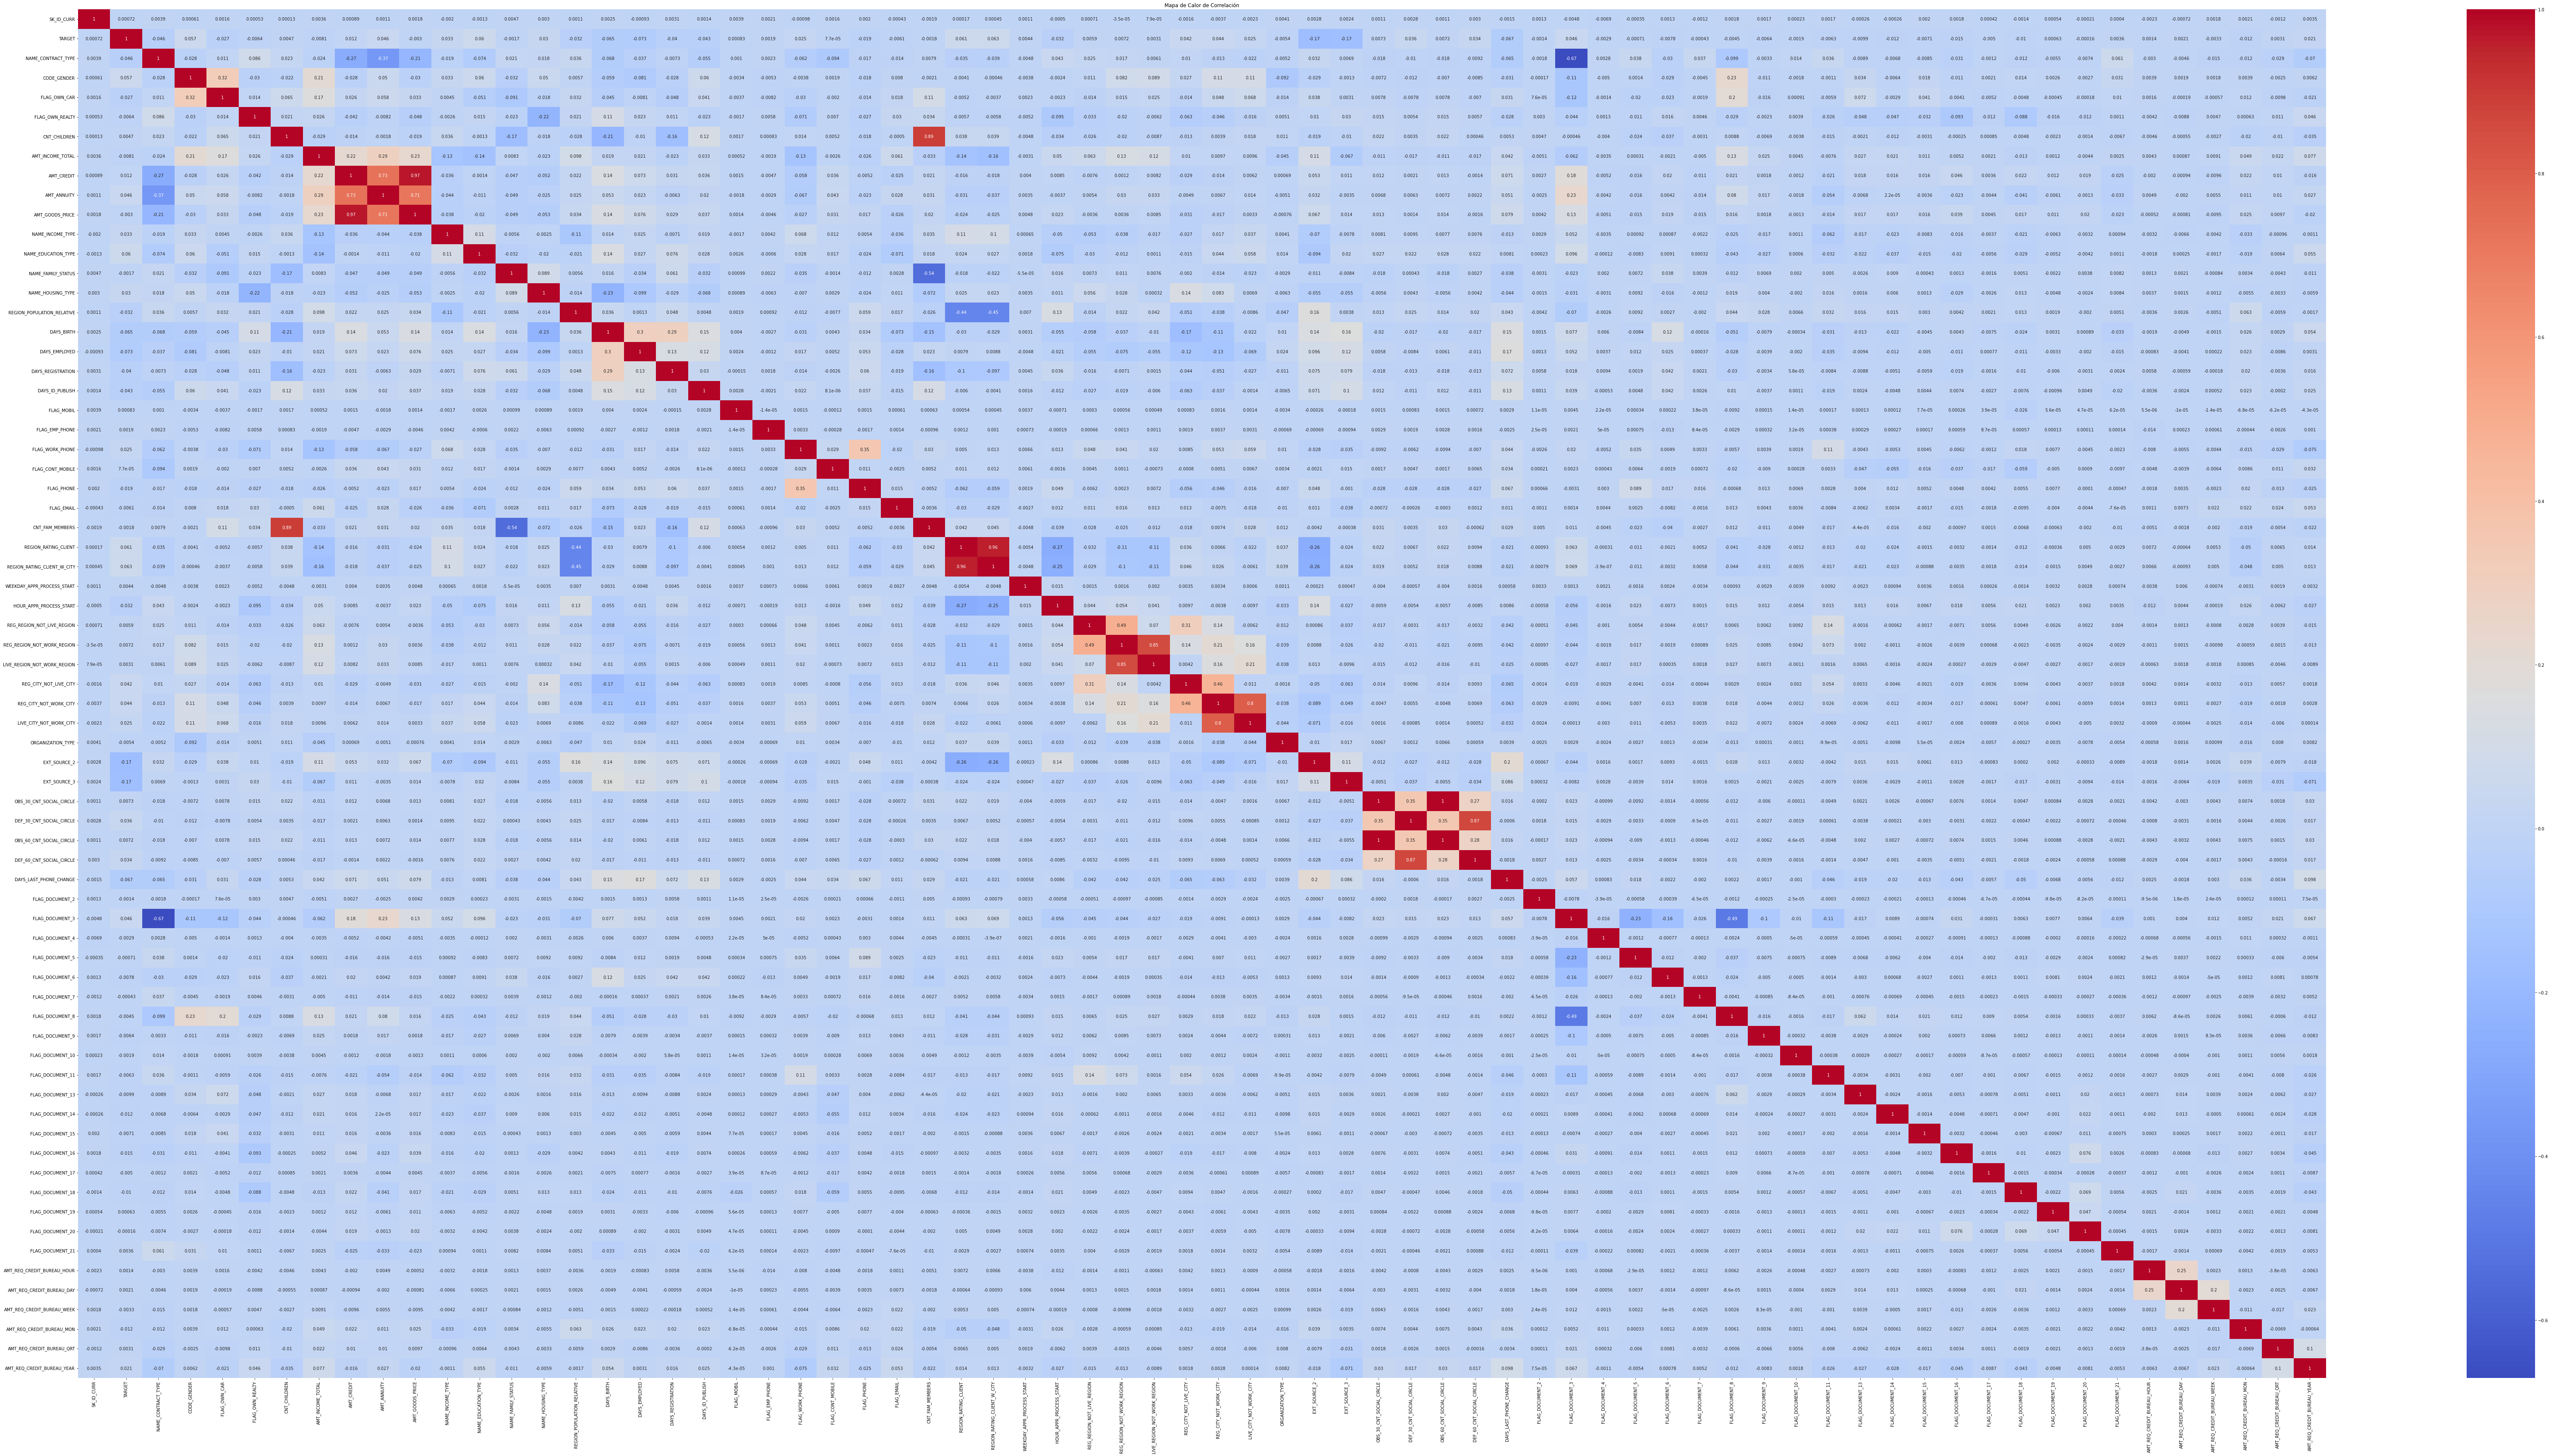

In [80]:
plt.figure(figsize=(120, 60))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [38]:
correlation_list = matriz_corr.unstack().sort_values(ascending=False).reset_index()
correlation_list.columns = ['Variable 1', 'Variable 2', 'Correlación']
correlation_list = correlation_list[correlation_list['Variable 1'] != correlation_list['Variable 2']]

print('Lista de Correlaciones:')
print(correlation_list)

Lista de Correlaciones:
                       Variable 1                Variable 2  Correlación
70       OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998531
71       OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.998531
72                     AMT_CREDIT           AMT_GOODS_PRICE     0.970265
73                AMT_GOODS_PRICE                AMT_CREDIT     0.970265
74    REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT     0.958222
...                           ...                       ...          ...
4895              FLAG_DOCUMENT_3           FLAG_DOCUMENT_8    -0.489880
4896              CNT_FAM_MEMBERS        NAME_FAMILY_STATUS    -0.540415
4897           NAME_FAMILY_STATUS           CNT_FAM_MEMBERS    -0.540415
4898              FLAG_DOCUMENT_3        NAME_CONTRACT_TYPE    -0.670668
4899           NAME_CONTRACT_TYPE           FLAG_DOCUMENT_3    -0.670668

[4830 rows x 3 columns]


In [39]:
correlation_list.to_excel("correlacion.xlsx", index=False)

In [81]:
##Luego de ya realizar la limpieza, ver outliders, correlaciones, vamos a determinar la importancia de las variable al querer
#predecir nuestra variable objetivo, lo haremos con la técnica de coeficientes, ya que estamos trabajando con un modelo lineal
#un regresor logistico 
#vamos a separar nuestro set entre variables caracteristicas y variable objetivo 
X = dataset_cat.drop('TARGET', axis=1)
y = dataset_cat["TARGET"]

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
LR = LinearRegression()
LR.fit(X_scaled, y)

LinearRegression()

In [84]:
importancia = LR.coef_

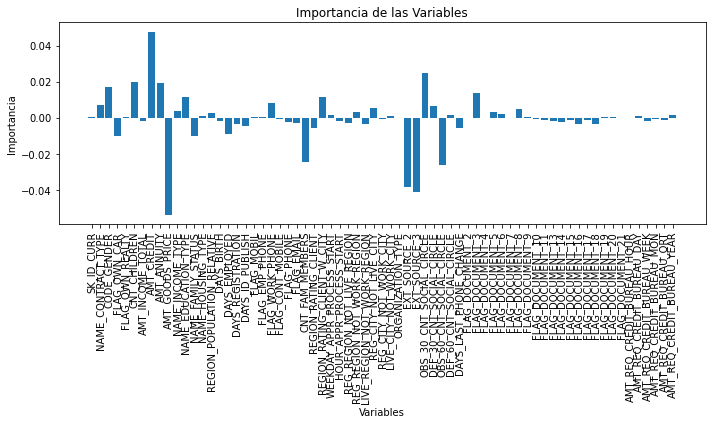

In [85]:
# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importancia )), importancia )
plt.xticks(range(len(importancia )), X.columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')
plt.tight_layout()
plt.show()

In [86]:
# X es la matriz de características y y es el vector objetivo
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=50)  # Selecciona el número de características que deseas mantener
X_selected = rfe.fit_transform(X_scaled, y)

# Obtén el ranking de características
feature_ranking = pd.DataFrame({'Variable': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values('Ranking')



In [87]:
# Imprime las características más importantes
print(feature_ranking.head(70))
#feature_ranking.to_excel("variables_imporantes.xlsx")

                       Variable  Ranking
68   AMT_REQ_CREDIT_BUREAU_YEAR        1
27  REGION_RATING_CLIENT_W_CITY        1
28   WEEKDAY_APPR_PROCESS_START        1
29      HOUR_APPR_PROCESS_START        1
30   REG_REGION_NOT_LIVE_REGION        1
..                          ...      ...
62             FLAG_DOCUMENT_21       16
49              FLAG_DOCUMENT_7       17
36            ORGANIZATION_TYPE       18
63   AMT_REQ_CREDIT_BUREAU_HOUR       19
60             FLAG_DOCUMENT_19       20

[69 rows x 2 columns]


In [88]:
#Luego de evaluar el Ranking de las variables importantes, se decide quedarse con las variables del ranking 1-5, ya que son las que 
#mayor peso tendrán al predecir la variable objetivo 

variables_noselecionadas_X = ["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_MON",
"DEF_60_CNT_SOCIAL_CIRCLE","FLAG_CONT_MOBILE","FLAG_DOCUMENT_11","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
"FLAG_DOCUMENT_21","FLAG_DOCUMENT_7","FLAG_DOCUMENT_9","FLAG_OWN_REALTY","NAME_HOUSING_TYPE","ORGANIZATION_TYPE","SK_ID_CURR"]

In [89]:
X_new = X.drop(variables_noselecionadas_X, axis = 1)

In [90]:
X_new.shape

(154690, 54)

In [91]:
#Ya sin las variables que no quedaron seleccionas se vuelve a generar las variables feature y escalarse 
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

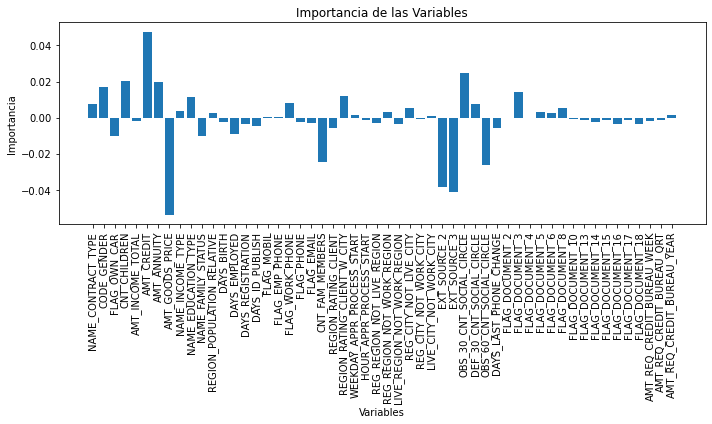

In [92]:
LR = LinearRegression()
LR.fit(X_scaled_new, y)
importancia2 = LR.coef_
# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importancia2 )), importancia2 )
plt.xticks(range(len(importancia2 )), X_new.columns, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables')
plt.tight_layout()
plt.show()

# regresor logistico

In [93]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.4, random_state=123)


# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9036136789708449
Precision: 0.4479166666666667
Recall: 0.014468371467025572
F1-score: 0.02803129074315515


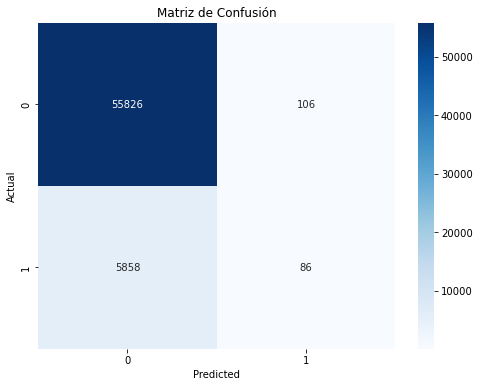

In [94]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas y título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()

In [95]:
#1ejercicio: Mejores hiperparámetros: {'max_depth': 20, 'n_estimators': 50}
            #Precisión del mejor modelo: 0.9040338742000129
#2ejercicio: Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 50}
            #Precisión del mejor modelo: 0.9038722606503329

# Random Forest

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as sfm
import tensorflow as tf
from keras import *

In [97]:
random_forest = RandomForestClassifier(criterion='entropy')
random_forest.fit(X_train, y_train)
rf_predict = random_forest.predict(X_test)

In [98]:
print(accuracy_score(y_test, rf_predict)*100, '%')

90.42116491046609 %


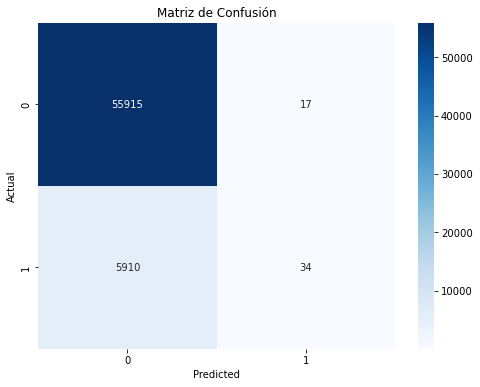

In [99]:
#graficamos matriz de confunción
cm = confusion_matrix(y_test, rf_predict)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas y título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()

In [102]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.67      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.79      0.50      0.48     61876
weighted avg       0.88      0.90      0.86     61876



profundidad del bosque:  5
numero de arboles:  3


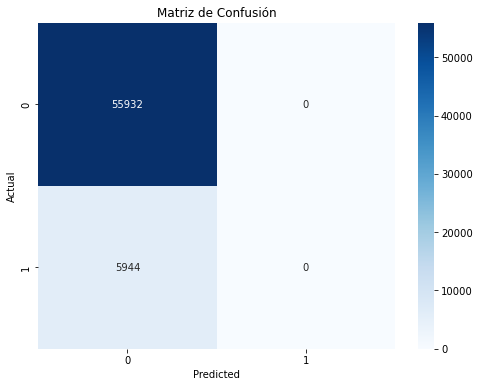

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  5
numero de arboles:  4


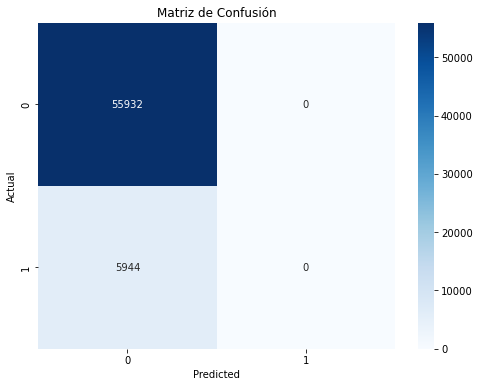

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  5
numero de arboles:  5


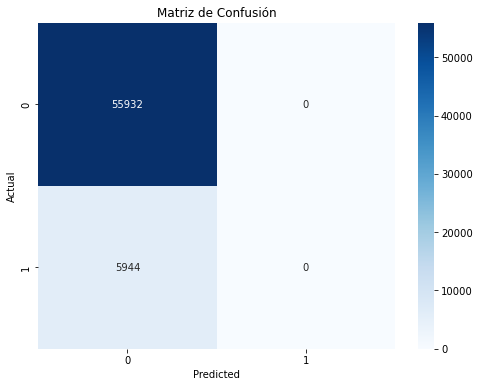

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  5
numero de arboles:  10


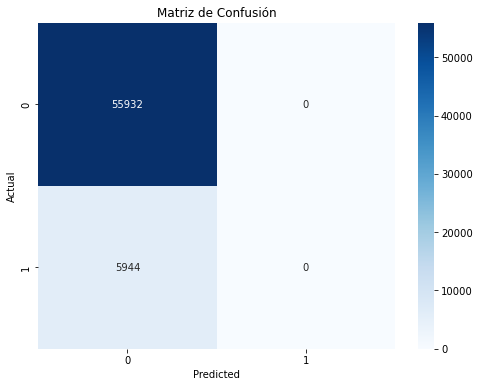

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  5
numero de arboles:  50


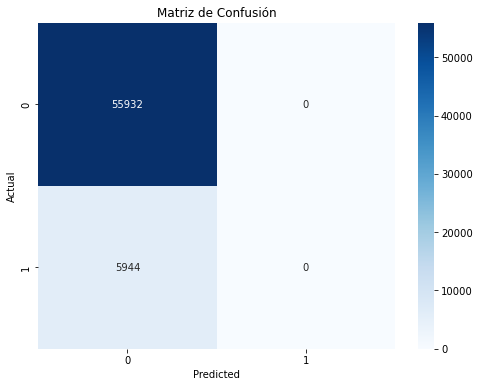

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  5
numero de arboles:  100


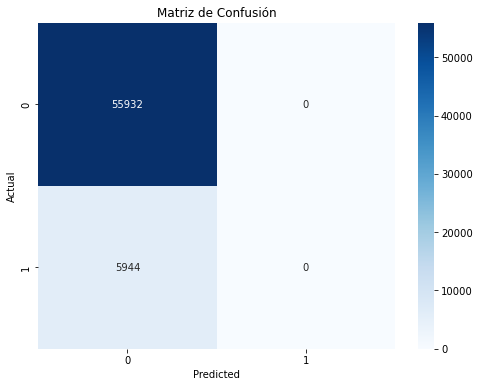

C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xavie\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.00      0.00      0.00      5944

    accuracy                           0.90     61876
   macro avg       0.45      0.50      0.47     61876
weighted avg       0.82      0.90      0.86     61876

profundidad del bosque:  20
numero de arboles:  3


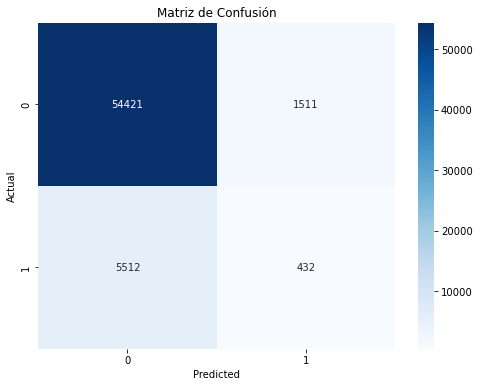

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     55932
           1       0.22      0.07      0.11      5944

    accuracy                           0.89     61876
   macro avg       0.57      0.52      0.52     61876
weighted avg       0.84      0.89      0.86     61876

profundidad del bosque:  20
numero de arboles:  4


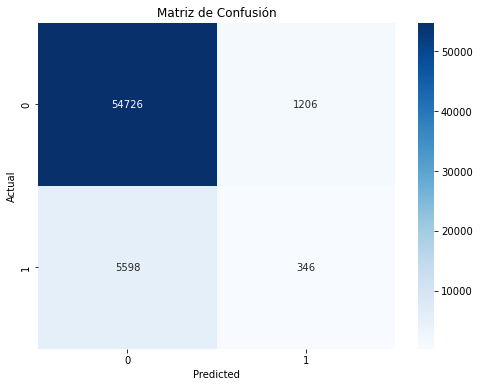

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.22      0.06      0.09      5944

    accuracy                           0.89     61876
   macro avg       0.57      0.52      0.52     61876
weighted avg       0.84      0.89      0.86     61876

profundidad del bosque:  20
numero de arboles:  5


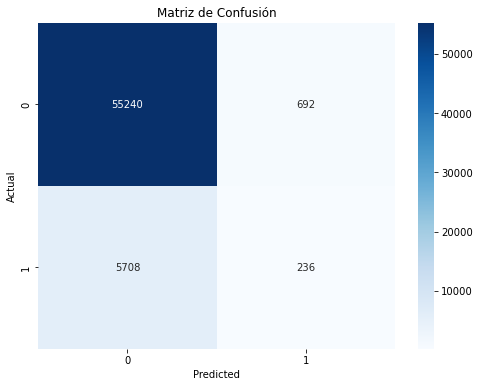

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.25      0.04      0.07      5944

    accuracy                           0.90     61876
   macro avg       0.58      0.51      0.51     61876
weighted avg       0.84      0.90      0.86     61876

profundidad del bosque:  20
numero de arboles:  10


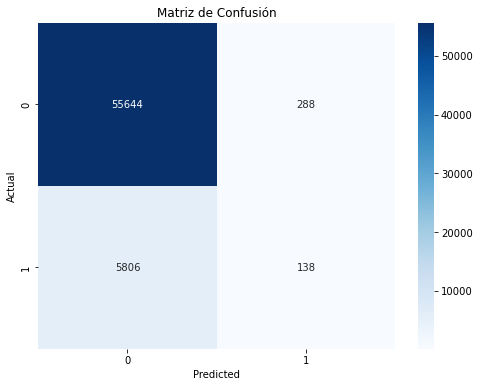

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.32      0.02      0.04      5944

    accuracy                           0.90     61876
   macro avg       0.61      0.51      0.50     61876
weighted avg       0.85      0.90      0.86     61876

profundidad del bosque:  20
numero de arboles:  50


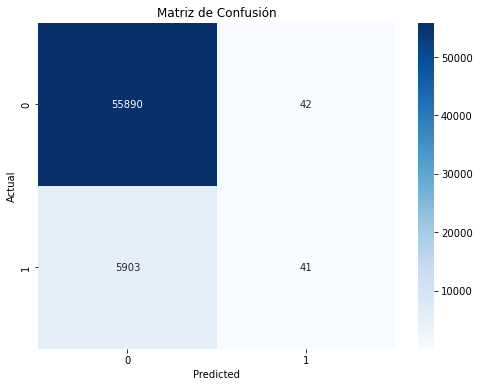

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.49      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.70      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876

profundidad del bosque:  20
numero de arboles:  100


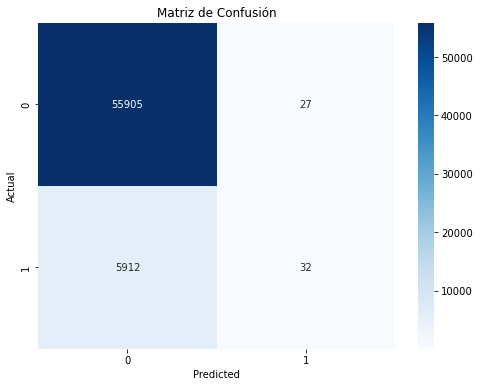

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.54      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.72      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876

profundidad del bosque:  25
numero de arboles:  3


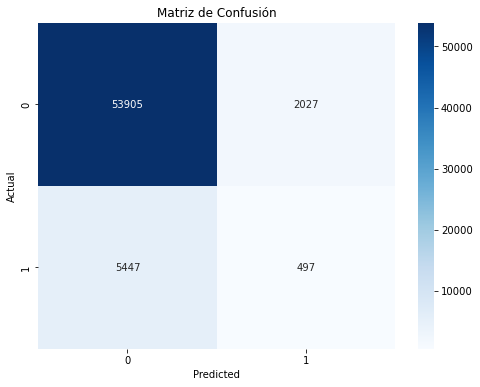

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     55932
           1       0.20      0.08      0.12      5944

    accuracy                           0.88     61876
   macro avg       0.55      0.52      0.53     61876
weighted avg       0.84      0.88      0.86     61876

profundidad del bosque:  25
numero de arboles:  4


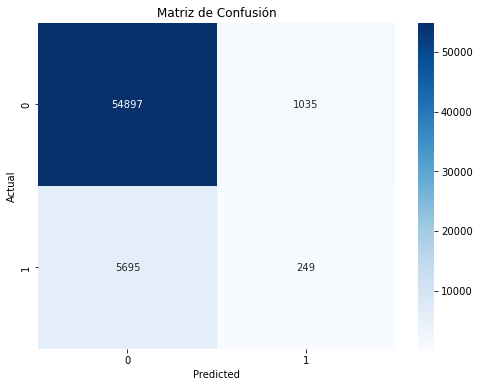

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.19      0.04      0.07      5944

    accuracy                           0.89     61876
   macro avg       0.55      0.51      0.51     61876
weighted avg       0.84      0.89      0.86     61876

profundidad del bosque:  25
numero de arboles:  5


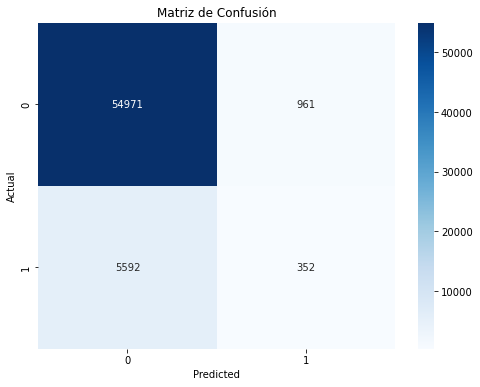

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.27      0.06      0.10      5944

    accuracy                           0.89     61876
   macro avg       0.59      0.52      0.52     61876
weighted avg       0.85      0.89      0.86     61876

profundidad del bosque:  25
numero de arboles:  10


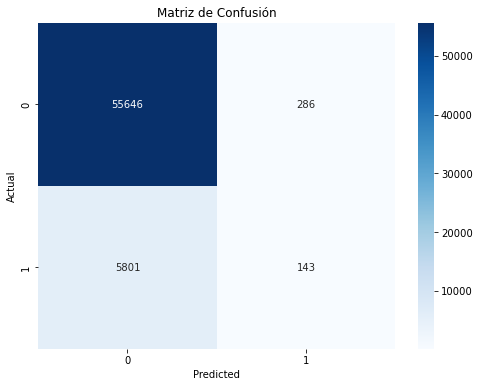

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.33      0.02      0.04      5944

    accuracy                           0.90     61876
   macro avg       0.62      0.51      0.50     61876
weighted avg       0.85      0.90      0.86     61876

profundidad del bosque:  25
numero de arboles:  50


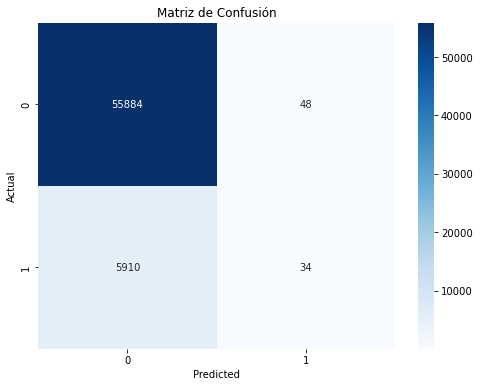

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.41      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.66      0.50      0.48     61876
weighted avg       0.86      0.90      0.86     61876

profundidad del bosque:  25
numero de arboles:  100


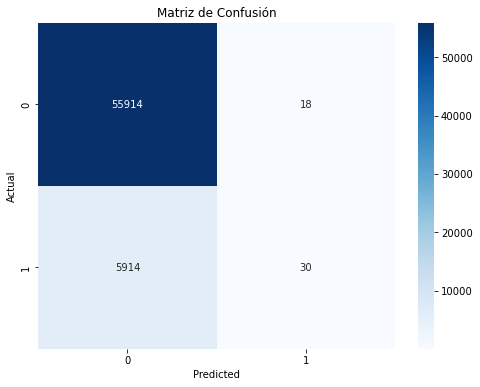

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.62      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.76      0.50      0.48     61876
weighted avg       0.88      0.90      0.86     61876

profundidad del bosque:  30
numero de arboles:  3


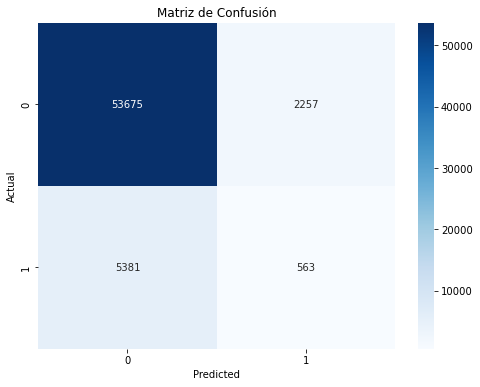

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     55932
           1       0.20      0.09      0.13      5944

    accuracy                           0.88     61876
   macro avg       0.55      0.53      0.53     61876
weighted avg       0.84      0.88      0.86     61876

profundidad del bosque:  30
numero de arboles:  4


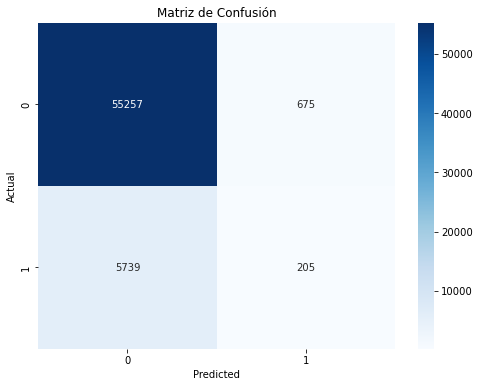

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.23      0.03      0.06      5944

    accuracy                           0.90     61876
   macro avg       0.57      0.51      0.50     61876
weighted avg       0.84      0.90      0.86     61876

profundidad del bosque:  30
numero de arboles:  5


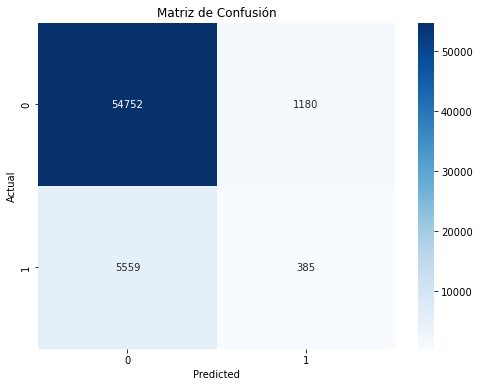

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.25      0.06      0.10      5944

    accuracy                           0.89     61876
   macro avg       0.58      0.52      0.52     61876
weighted avg       0.84      0.89      0.86     61876

profundidad del bosque:  30
numero de arboles:  10


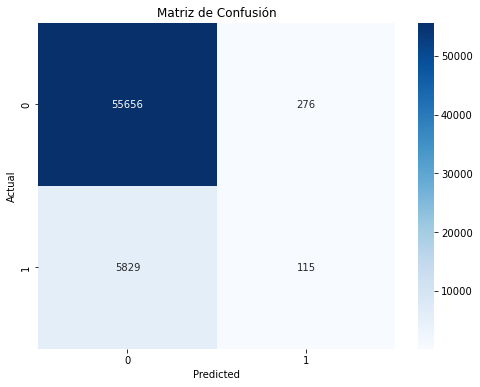

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     55932
           1       0.29      0.02      0.04      5944

    accuracy                           0.90     61876
   macro avg       0.60      0.51      0.49     61876
weighted avg       0.85      0.90      0.86     61876

profundidad del bosque:  30
numero de arboles:  50


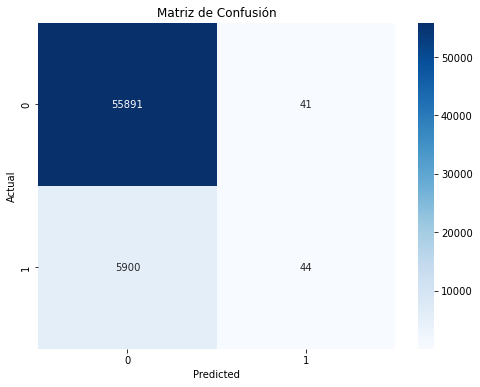

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.52      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.71      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876

profundidad del bosque:  30
numero de arboles:  100


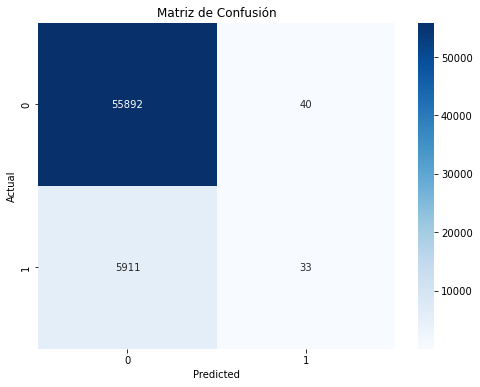

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.45      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.68      0.50      0.48     61876
weighted avg       0.86      0.90      0.86     61876

profundidad del bosque:  35
numero de arboles:  3


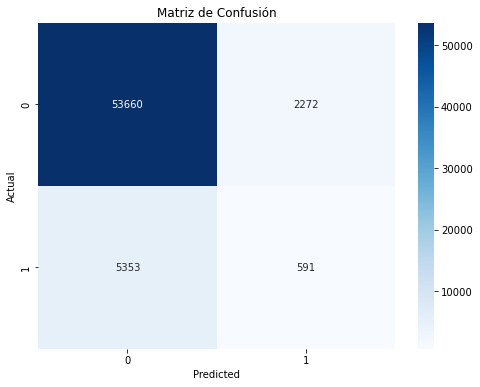

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     55932
           1       0.21      0.10      0.13      5944

    accuracy                           0.88     61876
   macro avg       0.56      0.53      0.53     61876
weighted avg       0.84      0.88      0.86     61876

profundidad del bosque:  35
numero de arboles:  4


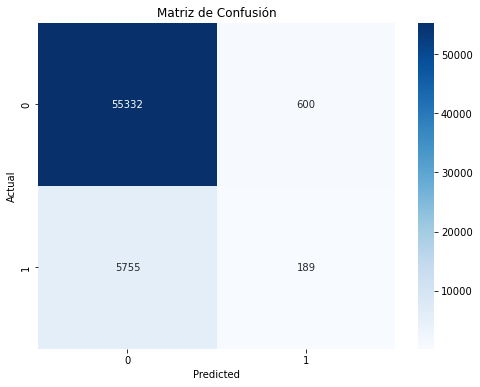

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.24      0.03      0.06      5944

    accuracy                           0.90     61876
   macro avg       0.57      0.51      0.50     61876
weighted avg       0.84      0.90      0.86     61876

profundidad del bosque:  35
numero de arboles:  5


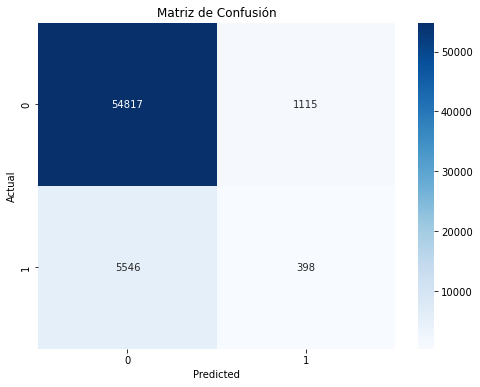

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.26      0.07      0.11      5944

    accuracy                           0.89     61876
   macro avg       0.59      0.52      0.52     61876
weighted avg       0.85      0.89      0.86     61876

profundidad del bosque:  35
numero de arboles:  10


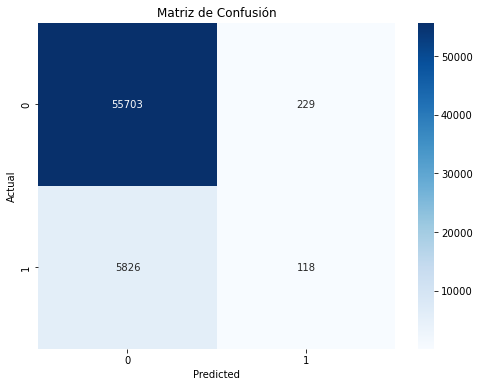

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     55932
           1       0.34      0.02      0.04      5944

    accuracy                           0.90     61876
   macro avg       0.62      0.51      0.49     61876
weighted avg       0.85      0.90      0.86     61876

profundidad del bosque:  35
numero de arboles:  50


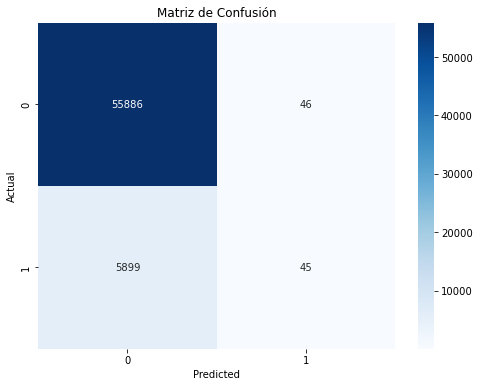

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.49      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.70      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876

profundidad del bosque:  35
numero de arboles:  100


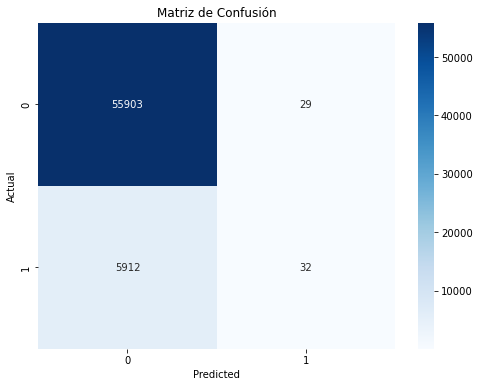

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.52      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.71      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876

profundidad del bosque:  40
numero de arboles:  3


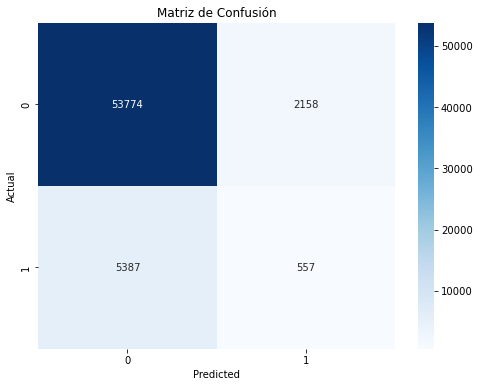

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     55932
           1       0.21      0.09      0.13      5944

    accuracy                           0.88     61876
   macro avg       0.56      0.53      0.53     61876
weighted avg       0.84      0.88      0.86     61876

profundidad del bosque:  40
numero de arboles:  4


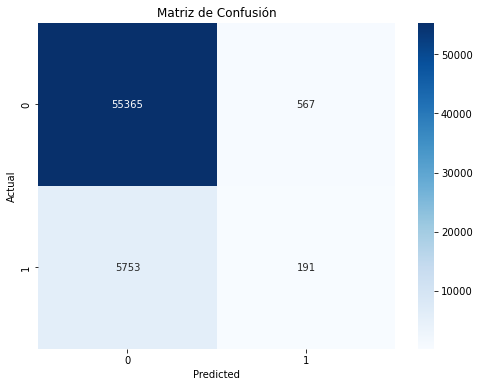

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     55932
           1       0.25      0.03      0.06      5944

    accuracy                           0.90     61876
   macro avg       0.58      0.51      0.50     61876
weighted avg       0.84      0.90      0.86     61876

profundidad del bosque:  40
numero de arboles:  5


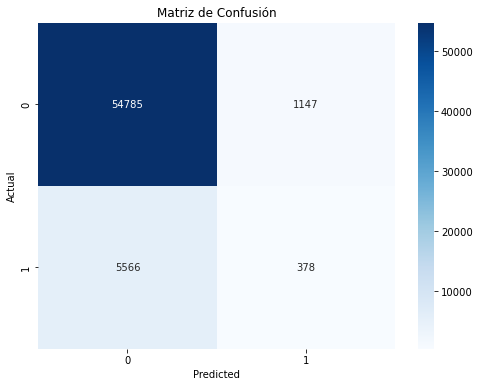

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     55932
           1       0.25      0.06      0.10      5944

    accuracy                           0.89     61876
   macro avg       0.58      0.52      0.52     61876
weighted avg       0.84      0.89      0.86     61876

profundidad del bosque:  40
numero de arboles:  10


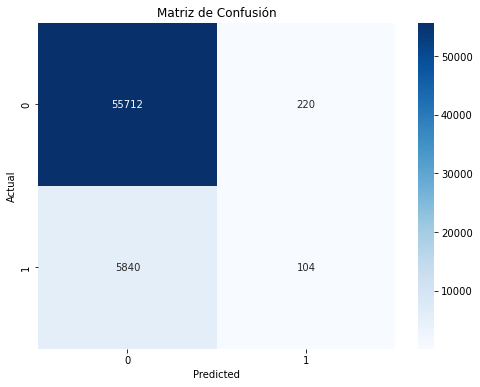

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     55932
           1       0.32      0.02      0.03      5944

    accuracy                           0.90     61876
   macro avg       0.61      0.51      0.49     61876
weighted avg       0.85      0.90      0.86     61876

profundidad del bosque:  40
numero de arboles:  50


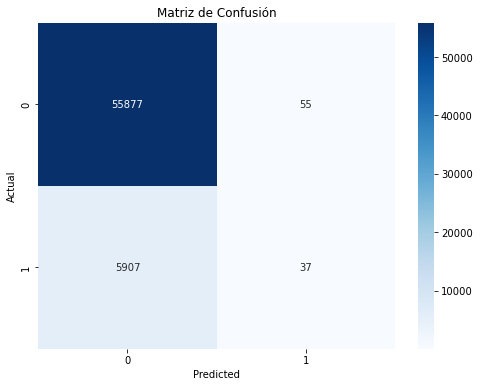

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.40      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.65      0.50      0.48     61876
weighted avg       0.86      0.90      0.86     61876

profundidad del bosque:  40
numero de arboles:  100


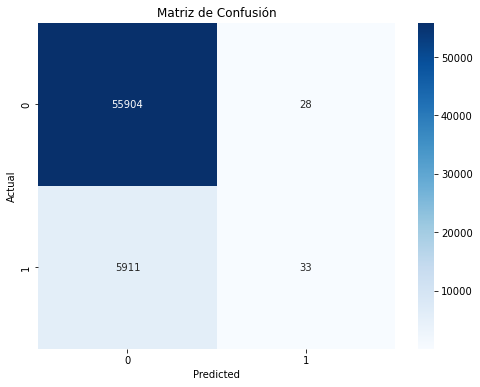

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55932
           1       0.54      0.01      0.01      5944

    accuracy                           0.90     61876
   macro avg       0.72      0.50      0.48     61876
weighted avg       0.87      0.90      0.86     61876



In [103]:
#Mejorando random forest, mediante hiperparametros 
for profundidad in [5,20,25,30,35,40]:
    for arboles in [3,4,5,10,50,100]:
        print('profundidad del bosque: ', profundidad)
        print('numero de arboles: ', arboles)
        random_forest_mejorado = RandomForestClassifier(criterion='gini', max_depth=profundidad, n_estimators=arboles)
        random_forest_mejorado.fit(X_train, y_train)
        rf_predict_mejorado = random_forest_mejorado.predict(X_test)
        cm = confusion_matrix(y_test, rf_predict_mejorado)

        # Crear una figura y un eje para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        # Configurar etiquetas y título
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Matriz de Confusión')

        # Mostrar la matriz de confusión
        plt.show()
        print(classification_report(y_test, rf_predict_mejorado))

## RED NEURONAL


In [104]:
import statsmodels.formula.api as sfm
import tensorflow as tf
from keras import *

In [105]:
#construimos la arquitectura de la red que vamos a utilizar para la clasificación
import keras
rn_classifier = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=([len(X_train[0])])), #entrada
    layers.Dense(64, activation='tanh'),
        layers.Dense(32, activation='softmax'), #intermedia
    layers.Dense(1, activation='tanh')]) #salida tangente hiperbólica, de la familia sigmoide
rn_classifier.compile(loss='binary_crossentropy',optimizer='ADAM',metrics=['accuracy'])
rn_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3520      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,793
Trainable params: 9,793
Non-trainable params: 0
_________________________________________________________________


In [106]:
#entreamos el modelo, 25o epochs
rn_classifier.fit(X_train,y_train,epochs=250)

Epoch 1/250
2901/2901 [==============================] - 2s 624us/step - loss: 0.3690 - accuracy: 0.9026
Epoch 2/250
2901/2901 [==============================] - 2s 615us/step - loss: 0.2892 - accuracy: 0.9026
Epoch 3/250
2901/2901 [==============================] - 2s 616us/step - loss: 0.2866 - accuracy: 0.9026
Epoch 4/250
2901/2901 [==============================] - 2s 621us/step - loss: 0.2858 - accuracy: 0.9026
Epoch 5/250
2901/2901 [==============================] - 2s 626us/step - loss: 0.2843 - accuracy: 0.9026
Epoch 6/250
2901/2901 [==============================] - 2s 628us/step - loss: 0.2825 - accuracy: 0.9025
Epoch 7/250
2901/2901 [==============================] - 2s 628us/step - loss: 0.2814 - accuracy: 0.9027
Epoch 8/250
2901/2901 [==============================] - 2s 654us/step - loss: 0.2796 - accuracy: 0.9029
Epoch 9/250
2901/2901 [==============================] - 2s 640us/step - loss: 0.2773 - accuracy: 0.9028
Epoch 10/250
2901/2901 [==============================]

2901/2901 [==============================] - 2s 622us/step - loss: 0.1684 - accuracy: 0.9413
Epoch 155/250
2901/2901 [==============================] - 2s 628us/step - loss: 0.1703 - accuracy: 0.9408
Epoch 156/250
2901/2901 [==============================] - 2s 626us/step - loss: 0.1762 - accuracy: 0.9382
Epoch 157/250
2901/2901 [==============================] - 2s 645us/step - loss: 0.1716 - accuracy: 0.9402
Epoch 158/250
2901/2901 [==============================] - 2s 628us/step - loss: 0.1712 - accuracy: 0.9410
Epoch 159/250
2901/2901 [==============================] - 2s 631us/step - loss: 0.1657 - accuracy: 0.9419
Epoch 160/250
2901/2901 [==============================] - 2s 626us/step - loss: 0.1702 - accuracy: 0.9410
Epoch 161/250
2901/2901 [==============================] - 2s 633us/step - loss: 0.1713 - accuracy: 0.9405
Epoch 162/250
2901/2901 [==============================] - 2s 628us/step - loss: 0.1744 - accuracy: 0.9407
Epoch 163/250
2901/2901 [==========================

In [107]:
#Predicción
y_pred_dnn = np.ceil(rn_classifier.predict(X_test).flatten())


#Transformar a entero las predicciones
y_pred_dnn_int = [abs(y) for y in y_pred_dnn]

1934/1934 [==============================] - 1s 432us/step


In [108]:
#Reporte de clasificación Red Neuronal Densa
print(classification_report(y_pred_dnn_int,y_test))

              precision    recall  f1-score   support

         0.0       0.42      0.93      0.58     25632
         1.0       0.68      0.11      0.19     36244

    accuracy                           0.45     61876
   macro avg       0.55      0.52      0.39     61876
weighted avg       0.58      0.45      0.35     61876



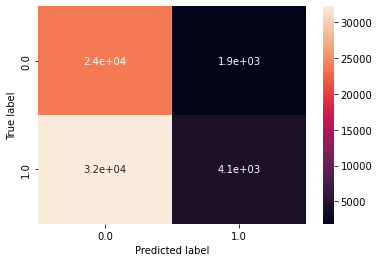

In [109]:
df_dnn = pd.DataFrame([y_pred_dnn_int,y_test.values]).T
df_dnn.columns=['y_Actual','y_Predicha']
confusion_matrix = pd.crosstab(df_dnn['y_Actual'], df_dnn['y_Predicha'], rownames=['True label'], colnames=['Predicted label'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# 